In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (9.0, 7.0)

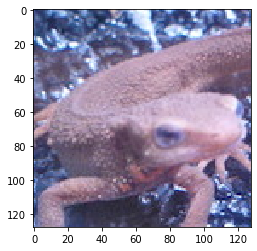

In [3]:
img = cv2.imread('imori.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

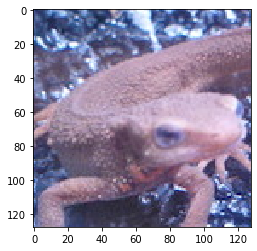

In [7]:
plt.imshow(img / 255)

# Task 21: Hitogram Normalization

In [3]:
def normalize_hist(img, a=0, b=255):
	# get max and min
	c = img.min()
	d = img.max()

	out = img.copy()

	# normalization
	out = (b-a) / (d - c) * (out - c) + a
	out[out < a] = a
	out[out > b] = b
	out = out.astype(np.uint8)
	
	return out

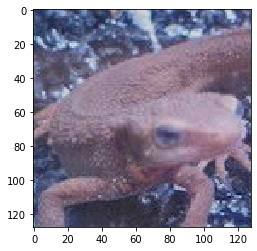

In [4]:
img = cv2.imread('imori_dark.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_norm = normalize_hist(img, 0, 255)
plt.imshow(img_norm)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 1.600e+01, 0.000e+00,
        0.000e+00, 2.600e+01, 0.000e+00, 0.000e+00, 7.400e+01, 0.000e+00,
        0.000e+00, 1.150e+02, 0.000e+00, 0.000e+00, 1.800e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 3.340e+02, 0.000e+00, 0.000e+00, 5.030e+02,
        0.000e+00, 0.000e+00, 6.100e+02, 0.000e+00, 0.000e+00, 6.930e+02,
        0.000e+00, 0.000e+00, 7.070e+02, 0.000e+00, 0.000e+00, 7.260e+02,
        0.000e+00, 0.000e+00, 7.860e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        8.300e+02, 0.000e+00, 0.000e+00, 9.020e+02, 0.000e+00, 0.000e+00,
        1.007e+03, 0.000e+00, 0.000e+00, 1.026e+03, 0.000e+00, 0.000e+00,
        1.147e+03, 0.000e+00, 0.000e+0

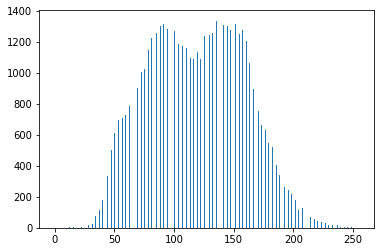

In [5]:
plt.hist(img_norm.ravel(),bins=255, rwidth=0.8, range=(0, 255))

# Task 22: Histgram Manipulation

In [6]:
def hist_manipulation(img, mean, std):
    out = img.copy()
    mean_old = np.mean(out)
    std_old = np.std(out)
    
    out = (std / std_old) * (out - mean_old) + mean
    out[out < 0] = 0
    out[out > 255] = 255
    out = out.astype(np.uint8)

    return out

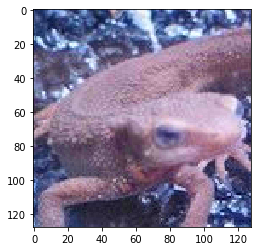

In [7]:
img = cv2.imread('imori_dark.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_alt = hist_manipulation(img, 128, 52)
plt.imshow(img_alt)

(array([   7.,    0.,    2.,    0.,    0.,    0.,    7.,    0.,    0.,
           0.,   16.,    0.,    0.,    0.,   26.,    0.,    0.,    0.,
          74.,    0.,    0.,    0.,    0.,  115.,    0.,    0.,    0.,
         180.,    0.,    0.,    0.,  334.,    0.,    0.,    0.,  503.,
           0.,    0.,    0.,  610.,    0.,    0.,    0.,  693.,    0.,
           0.,    0.,  707.,    0.,    0.,    0.,  726.,    0.,    0.,
           0.,  786.,    0.,    0.,    0.,  830.,    0.,    0.,    0.,
         902.,    0.,    0.,    0., 1007.,    0.,    0.,    0., 1026.,
           0.,    0.,    0.,    0., 1147.,    0.,    0.,    0., 1224.,
           0.,    0.,    0., 1257.,    0.,    0.,    0., 1302.,    0.,
           0.,    0., 1316.,    0.,    0.,    0., 1283.,    0.,    0.,
           0., 1185.,    0.,    0.,    0., 1268.,    0.,    0.,    0.,
        1186.,    0.,    0.,    0., 1174.,    0.,    0.,    0., 1159.,
           0.,    0.,    0., 1092.,    0.,    0.,    0.,    0., 1086.,
      

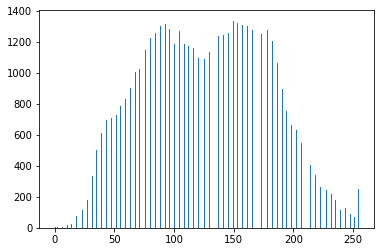

In [8]:
plt.hist(img_alt.ravel() ,bins=255, rwidth=0.8, range=(0, 255))

# Q23: Histogram Equalization

In [9]:
def equalize_hist(img, z_max=255):
    height, width, channel = img.shape
    S = height*width*channel*1.
    
    out = img.copy()
    
    sum_h = 0
    
    for i in range(1, 256):
        idx = np.where(img == i)
        sum_h += len(img[idx])
        z_prime =z_max / S * sum_h
        out[idx] = z_prime
    
    out = out.astype(np.uint8)
    
    return out
    

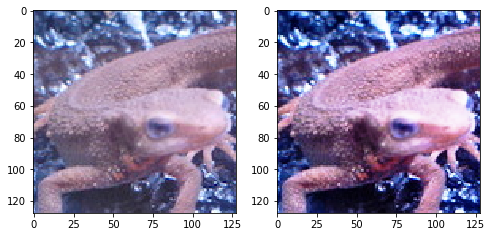

In [10]:
img = cv2.imread('imori.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(8, 8))
ax = fig.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(equalize_hist(img, 255))

(array([169., 165., 152., 216., 136., 313., 151., 185., 162., 162., 189.,
        187., 188., 167., 350., 185., 184., 202., 195., 183., 182., 217.,
          0., 210., 212., 200., 175., 222., 194., 211., 208., 244., 232.,
          0., 212., 227., 241., 229., 242.,   0., 231., 245., 262.,   0.,
        289., 277.,   0., 264., 284.,   0., 297., 300.,   0., 314., 284.,
          0., 294., 333.,   0., 320.,   0., 343.,   0., 352., 343.,   0.,
        317.,   0., 385.,   0., 337.,   0., 346., 342.,   0., 329.,   0.,
        332., 290.,   0., 305., 285.,   0., 353.,   0., 296., 324.,   0.,
        273.,   0., 330., 335.,   0., 313.,   0., 300., 313.,   0., 325.,
        285.,   0., 323., 280.,   0., 289.,   0., 319., 305., 247.,   0.,
        242., 283.,   0., 281., 261., 273.,   0., 255., 264.,   0., 280.,
        251., 249.,   0., 283., 296., 251.,   0., 267., 282.,   0., 302.,
        284.,   0., 276., 311.,   0., 296.,   0., 303., 301.,   0., 286.,
        329.,   0., 275., 314.,   0., 

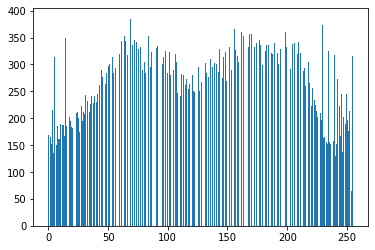

In [11]:
plt.hist(equalize_hist(img, 255).ravel() ,bins=255, rwidth=0.8, range=(0, 255))

# Q24: Gamma Correction

In [12]:
def gamma_correction(img, c=1., g=2.2):
    out = img.copy()
    out = ((1 / c) * out) ** (1/g)
    
    return out

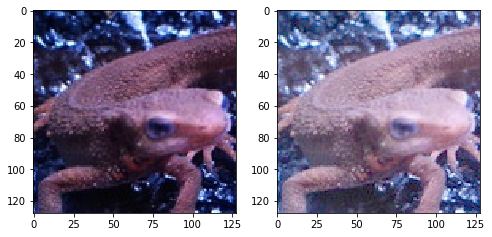

In [13]:
img = cv2.imread('imori_gamma.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(8, 8))
ax = fig.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(gamma_correction(img, 255))

# Q25: Nearest Neighbor Interpolation

In [37]:
def nearest_neighbor(img, a=1.5):
    H,W,C = img.shape
    new_H, new_W = map(int, [a*H, a*W])
    
    print(new_H, new_W)
    
    out = np.zeros(shape=(new_H, new_W, C))
    
    for h in range(new_H):
        for w in range(new_W):
            for c in range(C):
                if h == 0 and w == 0:
                    out[h, w, c] = img[h, w, c]
                elif w != 0 and h== 0:
                    out[h, w, c] = img[h, round(w/(a)), c]
                elif w == 0 and h!= 0:
                    out[h, w, c] = img[round(h/(a*h)), w, c]
                else:
                    out[h, w, c] = img[round(h/(a)), round(w/(a)), c]
                
    out = out.astype(np.uint8)
    
    return out

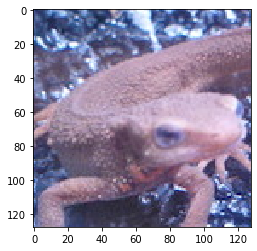

In [38]:
img = cv2.imread('imori.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

192 192


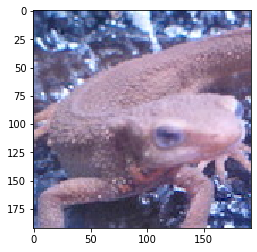

In [39]:
img_n = nearest_neighbor(img)
plt.imshow(img_n)